In [1]:
import numpy as np 
import pandas as pd                              # for data exploration
import matplotlib.pyplot as plt                  # for plotting the graphs
import seaborn as sns                            # for plotting the graphs
from numpy import quantile, where, random
from sklearn.ensemble import IsolationForest     # Importing the Isolation Forest model from scikit learn library
from sklearn.neighbors import LocalOutlierFactor # Importing the Local Outlier Factor model from scikit learn library

In [2]:
orbit_data = pd.read_csv("SMA_data.csv") # Loading the dataset using pandas 
orbit_data['Datetime'] = pd.to_datetime(orbit_data['Datetime'], errors='coerce')
orbit_data.head()

,Datetime,SMA
0,2018-01-01 04:34:10.320672,6864.691463
1,2018-01-01 12:37:36.596064,6864.689664
2,2018-01-01 20:31:55.898112,6864.688585
3,2018-01-02 05:42:49.014720,6864.684927
4,2018-01-02 12:13:01.263360,6864.682858


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(orbit_data['Datetime'], orbit_data['SMA'])
plt.xlabel('Datetime')
plt.ylabel('SMA (km)')
plt.title('Semi-Major Axis (SMA) Variation Over Time',fontsize=16)
plt.show()

Period of highest increase: 2019-03-26 04:53:33.243936 to 2019-03-27 04:34:36.436800
Total SMA change during this period: 5.10 km


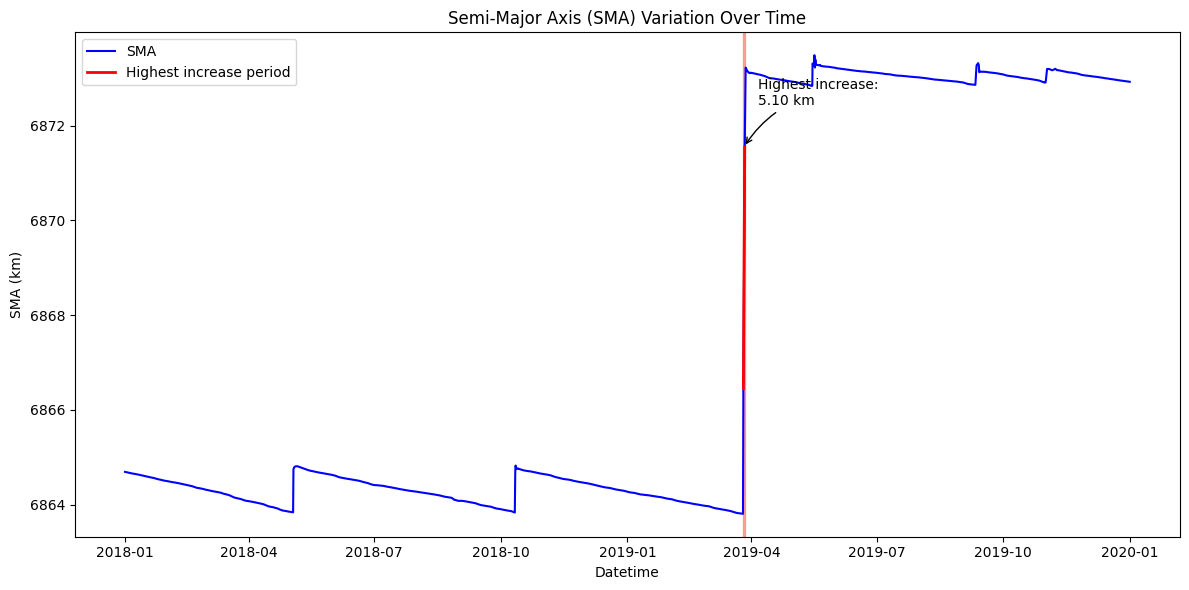


SMA values around this period:
Datetime
2019-03-23 19:01:20.349696    6863.815982
2019-03-24 02:37:41.537856    6863.815023
2019-03-24 11:55:51.155904    6863.813345
2019-03-24 18:37:17.526720    6863.812506
2019-03-24 23:11:57.255360    6863.812026
2019-03-25 03:44:44.539584    6863.810498
2019-03-25 11:42:42.171840    6863.808579
2019-03-25 19:39:43.269120    6863.807021
2019-03-25 22:39:31.243968    6863.806871
2019-03-26 04:53:33.243936    6866.447702
2019-03-27 04:34:36.436800    6871.548711
2019-03-27 20:25:37.599168    6873.222542
2019-03-28 20:04:36.873696    6873.161641
2019-03-29 15:08:05.466912    6873.129461
Name: SMA, dtype: float64


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
orbit_data = pd.read_csv("SMA_data.csv")
# Assuming orbit_data is your DataFrame
orbit_data['Datetime'] = pd.to_datetime(orbit_data['Datetime'])
orbit_data = orbit_data.sort_values('Datetime')
orbit_data = orbit_data.set_index('Datetime')

# Calculate the change in SMA for each point
orbit_data['SMA_change'] = orbit_data['SMA'].diff()

# Find the largest positive change
max_change = orbit_data['SMA_change'].max()
max_change_date = orbit_data['SMA_change'].idxmax()

# Find the start of this change
start_date = orbit_data.index[orbit_data.index.get_loc(max_change_date) - 1]
end_date = max_change_date

print(f"Period of highest increase: {start_date} to {end_date}")
print(f"Total SMA change during this period: {max_change:.2f} km")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(orbit_data.index, orbit_data['SMA'], label='SMA', color='blue')
plt.plot([start_date, end_date], 
         orbit_data.loc[[start_date, end_date], 'SMA'], 
         color='red', linewidth=2, label='Highest increase period')

plt.title('Semi-Major Axis (SMA) Variation Over Time')
plt.xlabel('Datetime')
plt.ylabel('SMA (km)')
plt.legend()

# Highlight the period of highest increase
plt.axvspan(start_date, end_date, color='red', alpha=0.3)

# Add text annotation
mid_point = start_date + (end_date - start_date) / 2
plt.annotate(f'Highest increase:\n{max_change:.2f} km', 
             xy=(mid_point, orbit_data.loc[end_date, 'SMA']),
             xytext=(10, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.tight_layout()
plt.show()

# Print the SMA values for a few days before and after this period
padding_days = 3
extended_start = start_date - pd.Timedelta(days=padding_days)
extended_end = end_date + pd.Timedelta(days=padding_days)
print("\nSMA values around this period:")
print(orbit_data.loc[extended_start:extended_end, 'SMA'])

In [32]:
6866.44770208533-6863.80687088211

2.640831203219932

In [34]:
6871.54871104156-6866.44770208533

5.101008956229634

In [33]:
6873.22254199694-6871.54871104156

1.6738309553802537

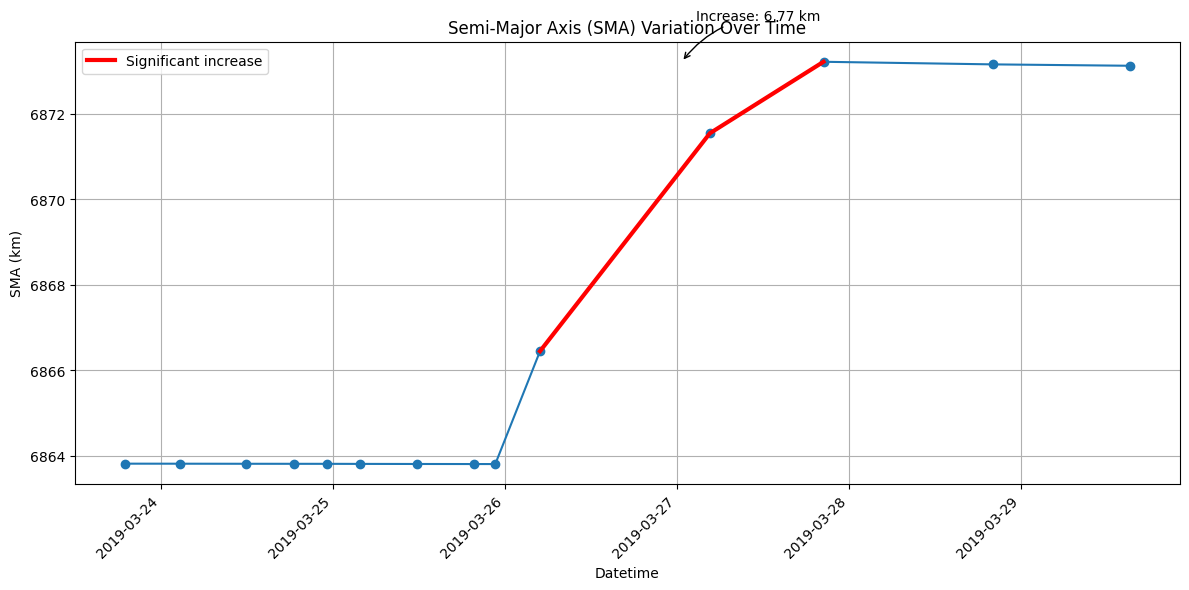

Significant increase period: 2019-03-26 04:53:33.243936 to 2019-03-27 20:25:37.599168
Total SMA change during this period: 6.77 km


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'Datetime': [
        '2019-03-23 19:01:20.349696', '2019-03-24 02:37:41.537856', '2019-03-24 11:55:51.155904',
        '2019-03-24 18:37:17.526720', '2019-03-24 23:11:57.255360', '2019-03-25 03:44:44.539584',
        '2019-03-25 11:42:42.171840', '2019-03-25 19:39:43.269120', '2019-03-25 22:39:31.243968',
        '2019-03-26 04:53:33.243936', '2019-03-27 04:34:36.436800', '2019-03-27 20:25:37.599168',
        '2019-03-28 20:04:36.873696', '2019-03-29 15:08:05.466912'
    ],
    'SMA': [
        6863.815982, 6863.815023, 6863.813345, 6863.812506, 6863.812026, 6863.810498,
        6863.808579, 6863.807021, 6863.806871, 6866.447702, 6871.548711, 6873.222542,
        6873.161641, 6873.129461
    ]
}

df = pd.DataFrame(data)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SMA'], marker='o')

# Highlight the significant increase
significant_increase_start = df.index[9]  # 2019-03-26 04:53:33.243936
significant_increase_end = df.index[11]   # 2019-03-27 20:25:37.599168

plt.plot(df.loc[significant_increase_start:significant_increase_end].index,
         df.loc[significant_increase_start:significant_increase_end, 'SMA'],
         color='red', linewidth=3, label='Significant increase')

plt.title('Semi-Major Axis (SMA) Variation Over Time')
plt.xlabel('Datetime')
plt.ylabel('SMA (km)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add text annotation for the significant increase
increase = df.loc[significant_increase_end, 'SMA'] - df.loc[significant_increase_start, 'SMA']
mid_point = significant_increase_start + (significant_increase_end - significant_increase_start) / 2
plt.annotate(f'Increase: {increase:.2f} km', 
             xy=(mid_point, df.loc[significant_increase_end, 'SMA']),
             xytext=(10, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.tight_layout()
plt.grid(True)
plt.show()

# Print the increase details
print(f"Significant increase period: {significant_increase_start} to {significant_increase_end}")
print(f"Total SMA change during this period: {increase:.2f} km")

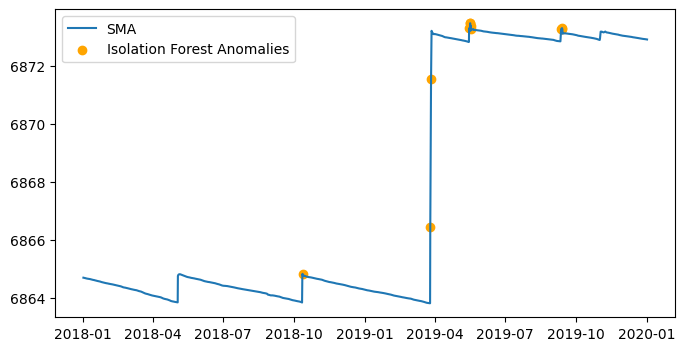

In [56]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.005, random_state=42)
orbit_data['anomaly_iforest'] = model.fit_predict(orbit_data[['SMA']])
orbit_data['anomaly_iforest'] = orbit_data['anomaly_iforest'].apply(lambda x: 1 if x == -1 else 0)

# Print the dates marked as anomalies
anomaly_dates = orbit_data[orbit_data['anomaly_iforest'] == 1]['Datetime']

# Plot the results
plt.figure(figsize=(8,4))
plt.plot(orbit_data['Datetime'], orbit_data['SMA'], label='SMA')
plt.scatter(orbit_data[orbit_data['anomaly_iforest'] == 1]['Datetime'], orbit_data[orbit_data['anomaly_iforest'] == 1]['SMA'], color='orange', label='Isolation Forest Anomalies')
plt.legend()
plt.show()


In [57]:
print("Dates marked as anomalies by Isolation Forest:")
print(anomaly_dates)
print(len(anomaly_dates))

Dates marked as anomalies by Isolation Forest:
872    2018-10-11 19:59:53.915424
1421   2019-03-26 04:53:33.243936
1422   2019-03-27 04:34:36.436800
1583   2019-05-15 10:44:36.864096
1585   2019-05-16 16:43:16.023072
1586   2019-05-16 21:23:42.085248
1588   2019-05-17 11:36:17.564832
1589   2019-05-17 19:40:34.037760
1946   2019-09-11 20:27:39.851712
1948   2019-09-12 16:52:11.580384
1949   2019-09-12 20:05:34.080000
Name: Datetime, dtype: datetime64[ns]
11


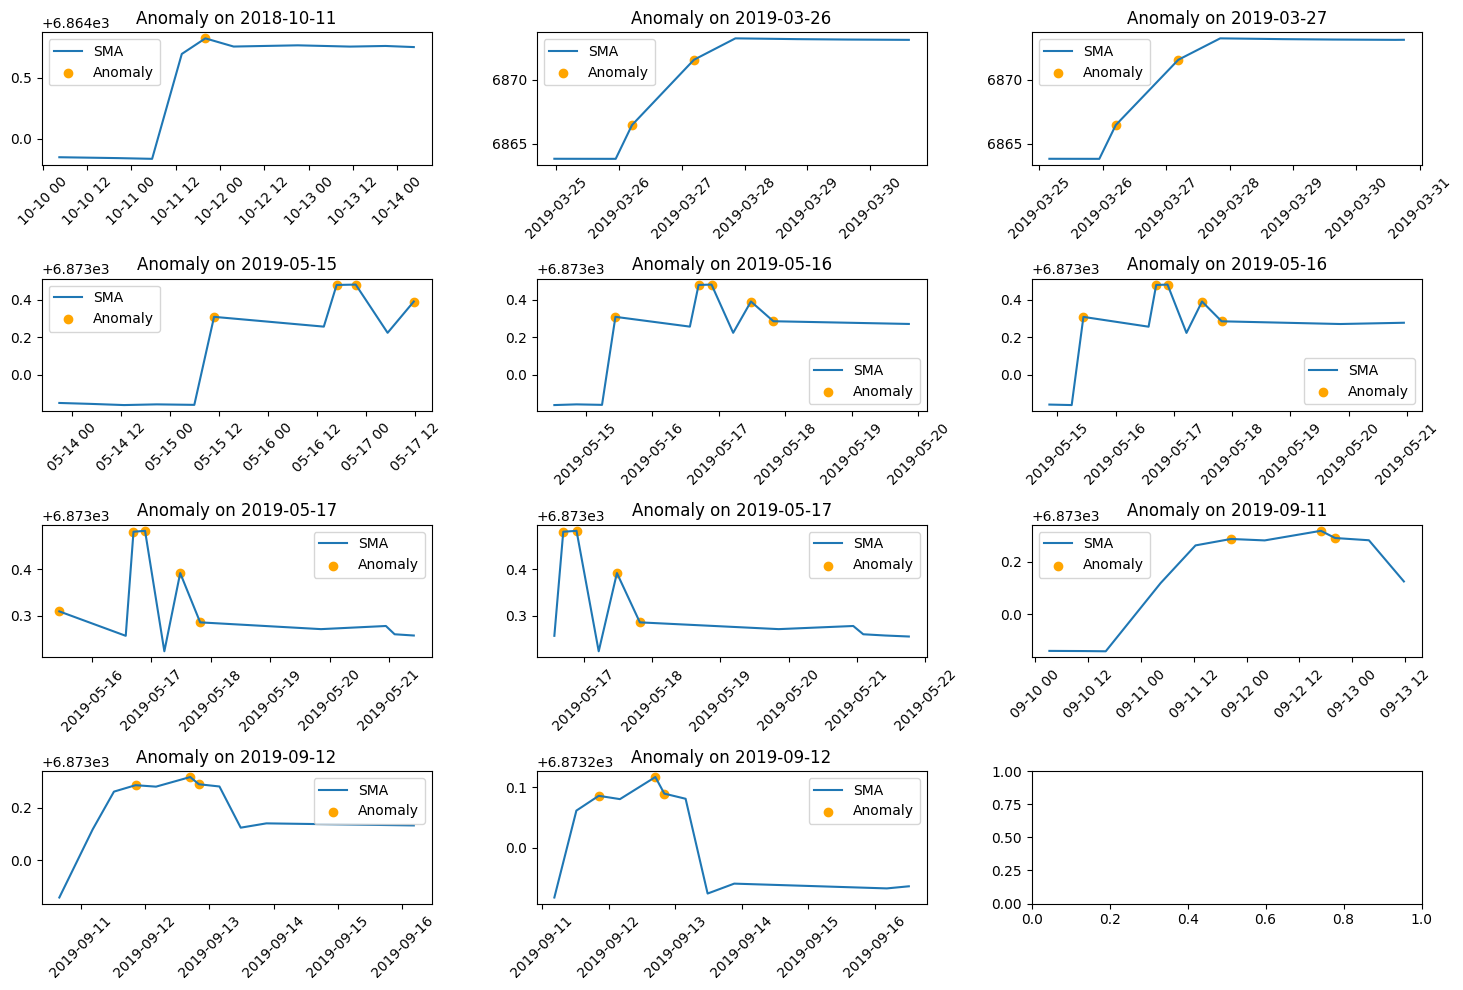

In [55]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd

# Assuming orbit_data is already defined and has the required columns
# Fit the Isolation Forest model
model = IsolationForest(contamination=0.005, random_state=42)
orbit_data['anomaly_iforest'] = model.fit_predict(orbit_data[['SMA']])
orbit_data['anomaly_iforest'] = orbit_data['anomaly_iforest'].apply(lambda x: 1 if x == -1 else 0)

# Extract anomaly dates
anomaly_dates = orbit_data[orbit_data['anomaly_iforest'] == 1]['Datetime']

# Initialize subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterate through each anomaly date and plot the surrounding data points
for idx, anomaly_date in enumerate(anomaly_dates):
    if idx >= 12:  # Limit to 12 plots (4x3 matrix)
        break
    
    # Find the index of the anomaly date
    anomaly_index = orbit_data[orbit_data['Datetime'] == anomaly_date].index[0]
    
    # Define the range around the anomaly date (5 points before and 5 points after)
    start_index = max(0, anomaly_index - 5)
    end_index = min(len(orbit_data), anomaly_index + 6)  # end_index is exclusive
    
    # Select the subset of data
    subset_data = orbit_data.iloc[start_index:end_index]
    
    # Plot on the corresponding subplot
    ax = axes[idx]
    ax.plot(subset_data['Datetime'], subset_data['SMA'], label='SMA')
    ax.scatter(subset_data[subset_data['anomaly_iforest'] == 1]['Datetime'], subset_data[subset_data['anomaly_iforest'] == 1]['SMA'], color='orange', label='Anomaly')
    ax.set_title(f'Anomaly on {anomaly_date.date()}')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


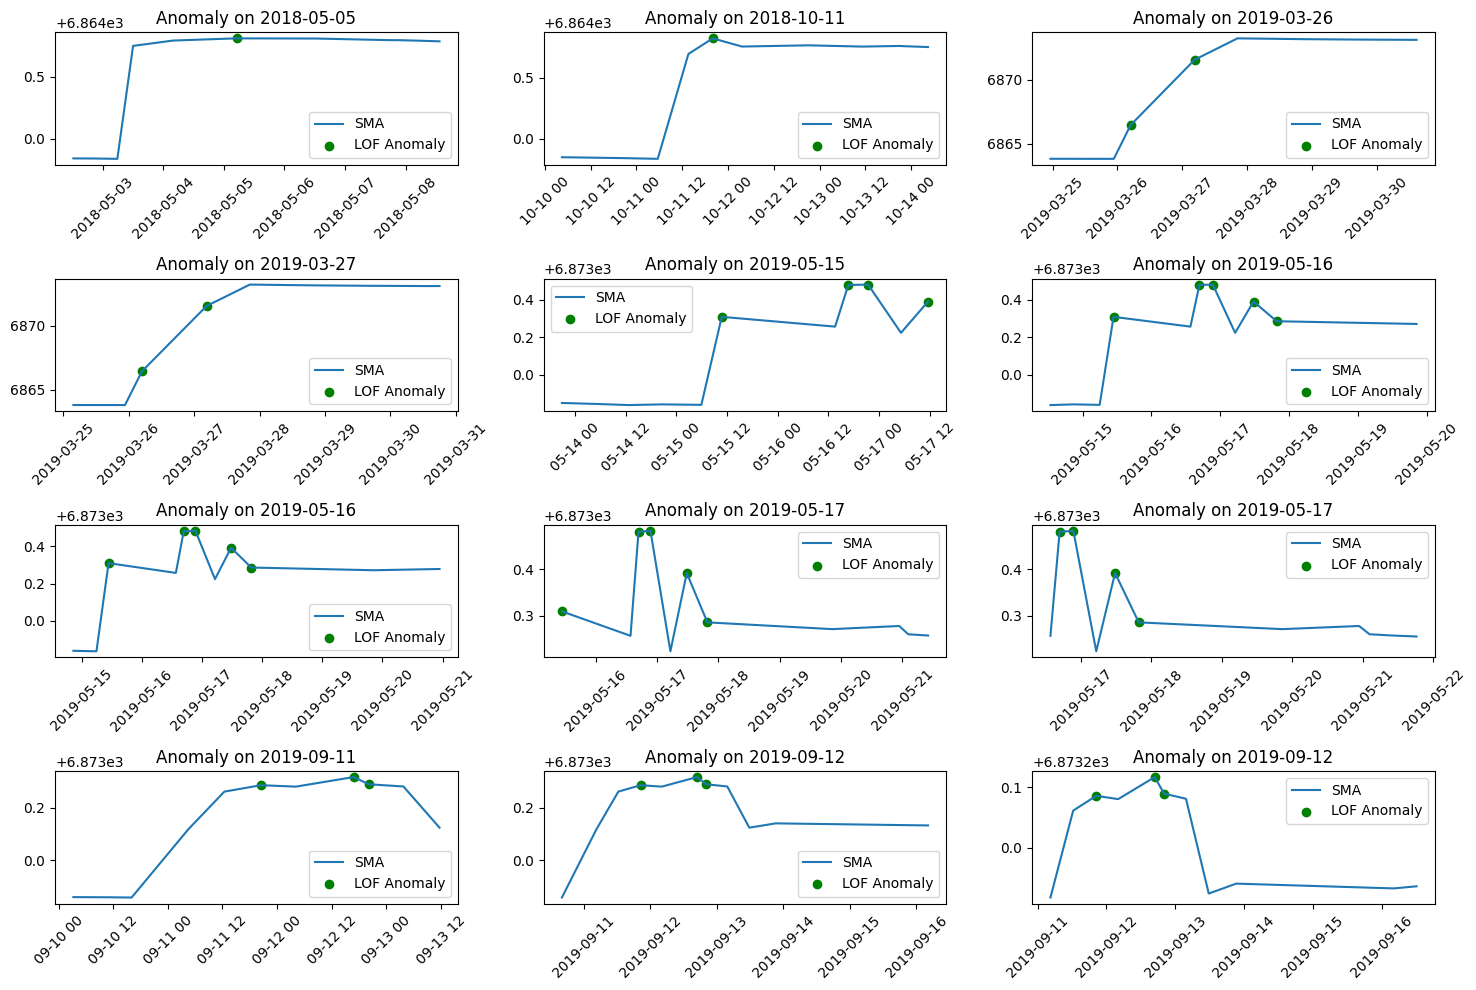

In [3]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import pandas as pd

# Assuming orbit_data is already defined and has the required columns
# Fit the Isolation Forest model
# model = IsolationForest(contamination=0.005, random_state=42)
# orbit_data['anomaly_iforest'] = model.fit_predict(orbit_data[['SMA']])
# orbit_data['anomaly_iforest'] = orbit_data['anomaly_iforest'].apply(lambda x: 1 if x == -1 else 0)

# Fit the LOF model
lof = LocalOutlierFactor(n_neighbors=40, contamination=0.0049)
orbit_data['anomaly_lof'] = lof.fit_predict(orbit_data[['SMA']])
orbit_data['anomaly_lof'] = orbit_data['anomaly_lof'].apply(lambda x: 1 if x == -1 else 0)

# Extract anomaly dates for LOF
anomaly_dates_lof = orbit_data[orbit_data['anomaly_lof'] == 1]['Datetime']

# Initialize subplots for LOF
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.flatten()

# Iterate through each anomaly date and plot the surrounding data points for LOF
for idx, anomaly_date in enumerate(anomaly_dates_lof):
    if idx >= 12:  # Limit to 12 plots (4x3 matrix)
        break
    
    # Find the index of the anomaly date
    anomaly_index = orbit_data[orbit_data['Datetime'] == anomaly_date].index[0]
    
    # Define the range around the anomaly date (5 points before and 5 points after)
    start_index = max(0, anomaly_index - 5)
    end_index = min(len(orbit_data), anomaly_index + 6)  # end_index is exclusive
    
    # Select the subset of data
    subset_data = orbit_data.iloc[start_index:end_index]
    
    # Plot on the corresponding subplot
    ax = axes[idx]
    ax.plot(subset_data['Datetime'], subset_data['SMA'], label='SMA')
    ax.scatter(subset_data[subset_data['anomaly_lof'] == 1]['Datetime'], subset_data[subset_data['anomaly_lof'] == 1]['SMA'], color='green', label='LOF Anomaly')
    ax.set_title(f'Anomaly on {anomaly_date.date()}')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
